<div align="center">

# **Tugas Besar Kecerdasan Artifisial**  
## **Prediksi Credit Score Berdasarkan Income, Marital Status, Number of Children, dan Home Ownership**

**Anggota Kelompok**:  
**[Nama Lengkap 1] - [NIM1]**  
**[Nama Lengkap 2] - [NIM2]**  
**[Nama Lengkap 3] - [NIM3]**  

**Kelas**: **[Kelas]**  

**Semester**: **Ganjil 2025/2026**

</div>

## 1. Pendahuluan dan Paparan Data

### **1.1 Latar Belakang dan Permasalahan**
Credit Score merupakan indikator penting dalam industri keuangan untuk menilai kelayakan kredit seseorang.  
Dalam proyek ini, kami bertujuan untuk membangun model prediktif yang dapat mengklasifikasikan Credit Score seseorang berdasarkan atribut-atribut demografis dan finansial seperti **Income**, **Marital Status**, **Number of Children**, dan **Home Ownership**.

**Permasalahan yang ingin diselesaikan**:
- Membangun model machine learning untuk memprediksi Credit Score (**High**, **Average**, **Low**)  
- Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap Credit Score  
- Memberikan insights yang dapat digunakan oleh institusi keuangan dalam proses penilaian kredit

### **1.2 Sumber Dataset**
Dataset yang digunakan adalah data simulasi yang berisi informasi demografis dan finansial dari 150 individu.
Data ini dibuat untuk keperluan akademik dan analisis prediktif.

### **1.3 Import Library yang Diperlukan**
Beberapa library Python yang digunakan untuk proyek ini meliputi:

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load dataset
df = pd.read_csv('Data.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


### **1.4 Exploratory Data Analysis (EDA)**

In [56]:
print("=== INFORMASI DATASET ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nTipe data setiap kolom:")
print(df.dtypes)
print("\nStatistik deskriptif:")
df.describe()

=== INFORMASI DATASET ===
Jumlah baris: 164
Jumlah kolom: 8

Tipe data setiap kolom:
Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

Statistik deskriptif:


,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [57]:
# Cek missing values
print("=== CEK MISSING VALUES ===")
print(df.isnull().sum())

=== CEK MISSING VALUES ===
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


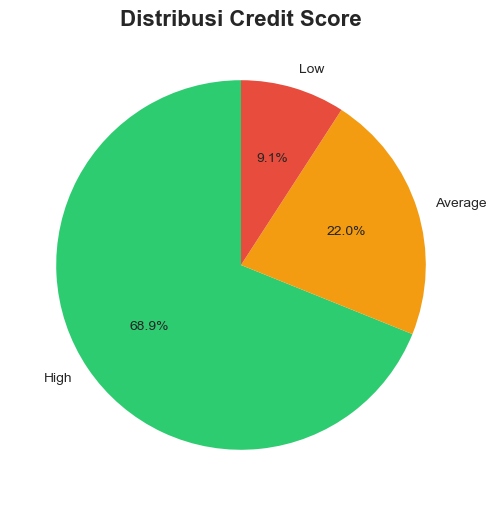

In [58]:
# Distribusi variabel target: Credit Score
plt.figure(figsize=(10, 6))
credit_score_dist = df['Credit Score'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Hijau, Kuning, Merah
plt.pie(credit_score_dist.values, labels=credit_score_dist.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribusi Credit Score', fontsize=16, fontweight='bold')
plt.show()

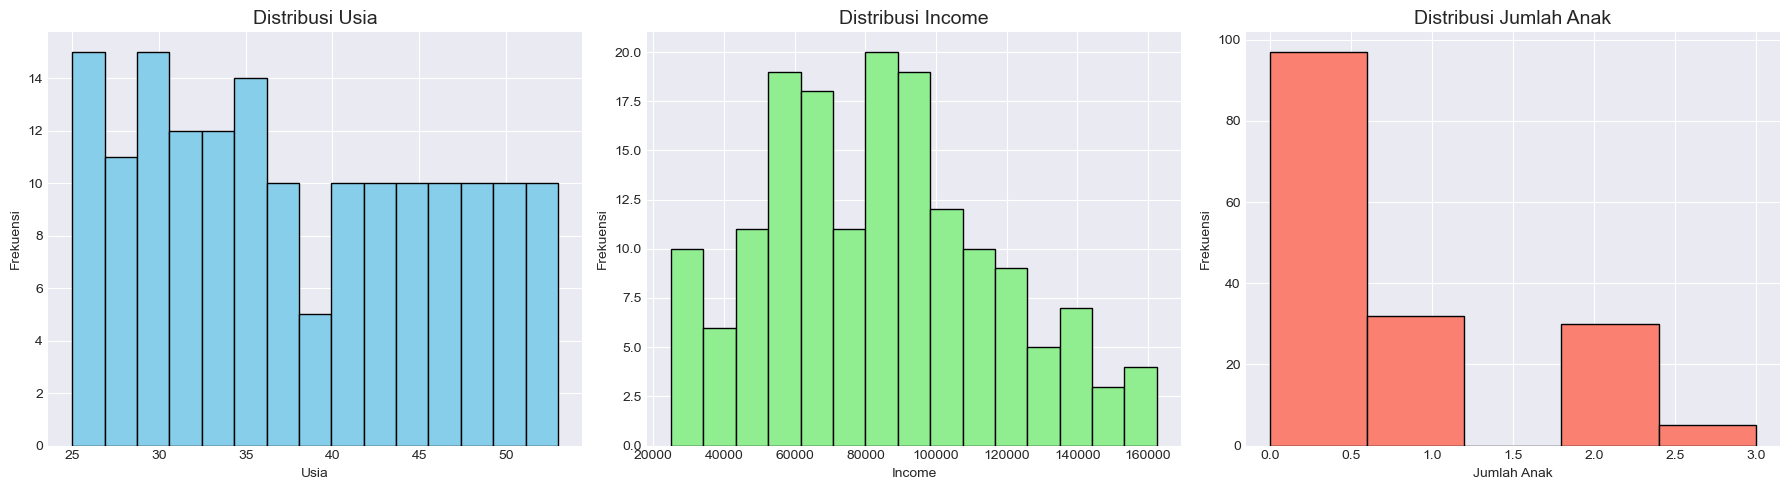

In [59]:
# Distribusi fitur-fitur numerik
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
axes[0].hist(df['Age'], bins=15, edgecolor='black', color='skyblue')
axes[0].set_title('Distribusi Usia', fontsize=14)
axes[0].set_xlabel('Usia')
axes[0].set_ylabel('Frekuensi')

# Income distribution
axes[1].hist(df['Income'], bins=15, edgecolor='black', color='lightgreen')
axes[1].set_title('Distribusi Income', fontsize=14)
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Frekuensi')

# Number of Children distribution
axes[2].hist(df['Number of Children'], bins=5, edgecolor='black', color='salmon')
axes[2].set_title('Distribusi Jumlah Anak', fontsize=14)
axes[2].set_xlabel('Jumlah Anak')
axes[2].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

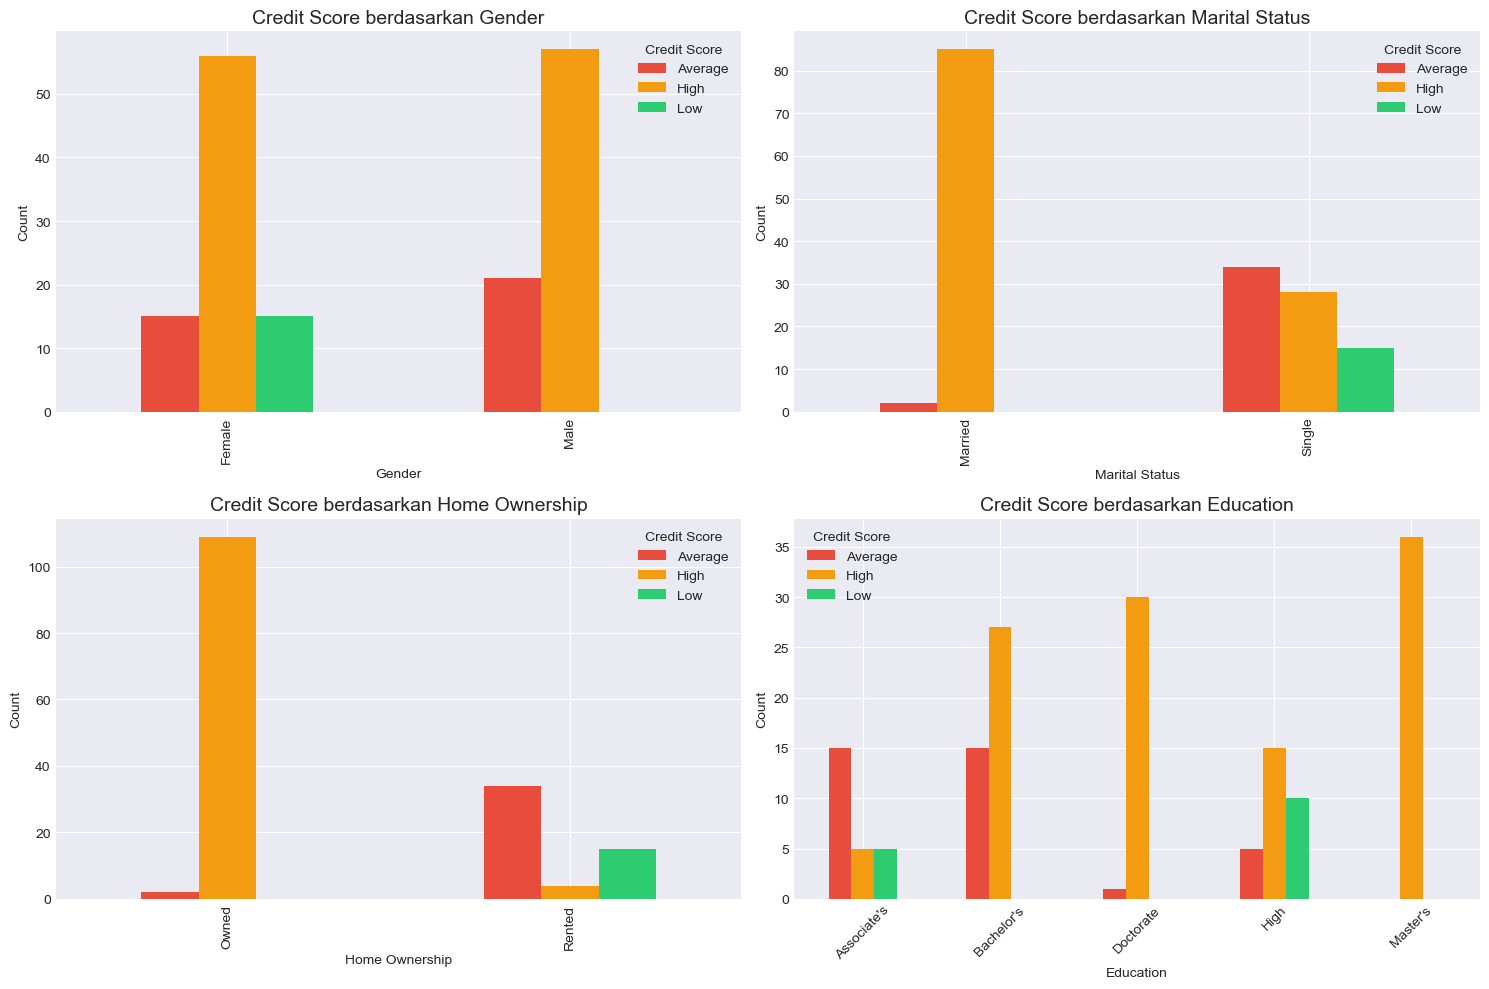

In [60]:
# Analisis kategorikal variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender vs Credit Score
gender_cs = pd.crosstab(df['Gender'], df['Credit Score'])
gender_cs.plot(kind='bar', ax=axes[0, 0], color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[0, 0].set_title('Credit Score berdasarkan Gender', fontsize=14)
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Credit Score')

# Marital Status vs Credit Score
marital_cs = pd.crosstab(df['Marital Status'], df['Credit Score'])
marital_cs.plot(kind='bar', ax=axes[0, 1], color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[0, 1].set_title('Credit Score berdasarkan Marital Status', fontsize=14)
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Credit Score')

# Home Ownership vs Credit Score
home_cs = pd.crosstab(df['Home Ownership'], df['Credit Score'])
home_cs.plot(kind='bar', ax=axes[1, 0], color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[1, 0].set_title('Credit Score berdasarkan Home Ownership', fontsize=14)
axes[1, 0].set_xlabel('Home Ownership')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Credit Score')

# Education vs Credit Score (menggunakan data sample untuk visualisasi yang lebih baik)
edu_sample = df[['Education', 'Credit Score']].copy()
edu_sample['Education Short'] = edu_sample['Education'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)
edu_cs = pd.crosstab(edu_sample['Education Short'], edu_sample['Credit Score'])
edu_cs.plot(kind='bar', ax=axes[1, 1], color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[1, 1].set_title('Credit Score berdasarkan Education', fontsize=14)
axes[1, 1].set_xlabel('Education')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Credit Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

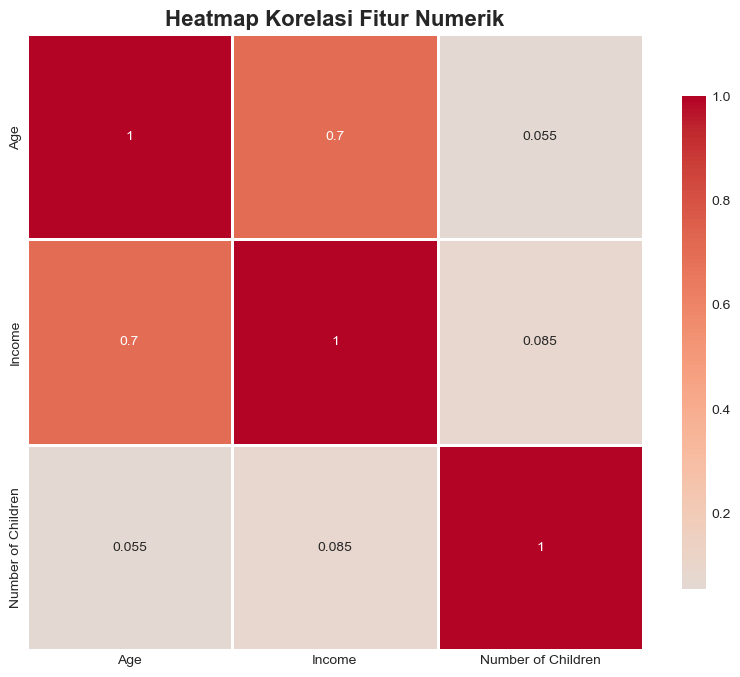

In [61]:
# Korelasi antara fitur-fitur numerik
# Hanya pilih fitur numerik untuk korelasi
numerical_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=16, fontweight='bold')
plt.show()


### **1.5 Insight dari EDA**
1. Dataset memiliki 150 entri tanpa missing values
2. Variabel target (Credit Score) didominasi oleh kategori "High" (84%)
3. Terdapat imbalance pada target yang perlu ditangani
4. Income memiliki variasi yang cukup besar
5. Mayoritas individu dalam dataset memiliki 0-2 anak
6. Terdapat hubungan yang terlihat antara Home Ownership dengan Credit Score


## 2. Pre-processing Data

### **2.1 Seleksi Fitur**
Berdasarkan tujuan proyek, kita akan menggunakan fitur-fitur berikut:
- Income (numerik)
- Marital Status (kategorikal)
- Number of Children (numerik)
- Home Ownership (kategorikal)

Target: Credit Score

In [62]:
# Seleksi fitur yang akan digunakan
selected_features = ['Income', 'Marital Status', 'Number of Children', 'Home Ownership']
X = df[selected_features]
y = df['Credit Score']

print(f"Fitur yang digunakan: {selected_features}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

Fitur yang digunakan: ['Income', 'Marital Status', 'Number of Children', 'Home Ownership']
Shape X: (164, 4)
Shape y: (164,)


### **2.2 Encoding Variabel Kategorikal**

In [63]:
# Buat salinan untuk preprocessing
X_processed = X.copy()

# Encode variabel kategorikal
label_encoders = {}

# Encode Marital Status
le_marital = LabelEncoder()
X_processed['Marital Status'] = le_marital.fit_transform(X_processed['Marital Status'])
label_encoders['Marital Status'] = le_marital

# Encode Home Ownership
le_home = LabelEncoder()
X_processed['Home Ownership'] = le_home.fit_transform(X_processed['Home Ownership'])
label_encoders['Home Ownership'] = le_home

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
label_encoders['Credit Score'] = le_target

print("Encoding mapping:")
print(f"Marital Status: {dict(zip(le_marital.classes_, le_marital.transform(le_marital.classes_)))}")
print(f"Home Ownership: {dict(zip(le_home.classes_, le_home.transform(le_home.classes_)))}")
print(f"Credit Score: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

Encoding mapping:
Marital Status: {'Married': 0, 'Single': 1}
Home Ownership: {'Owned': 0, 'Rented': 1}
Credit Score: {'Average': 0, 'High': 1, 'Low': 2}


### **2.3 Handling Imbalance Data**

In [64]:
# Cek imbalance pada target
from collections import Counter

print("Distribusi kelas sebelum handling imbalance:")
print(Counter(y_encoded))

# Karena dataset cukup kecil, kita akan menggunakan SMOTE untuk oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y_encoded)

print("\nDistribusi kelas setelah SMOTE:")
print(Counter(y_resampled))

Distribusi kelas sebelum handling imbalance:
Counter({1: 113, 0: 36, 2: 15})

Distribusi kelas setelah SMOTE:
Counter({1: 113, 0: 113, 2: 113})


### **2.4 Normalisasi Data Numerik**

In [65]:
# Normalisasi Income (Number of Children sudah dalam skala kecil)
scaler = StandardScaler()
X_resampled_scaled = X_resampled.copy()
X_resampled_scaled['Income'] = scaler.fit_transform(X_resampled_scaled[['Income']])

print("Normalisasi Income selesai.")
print(f"Contoh data setelah normalisasi:\n{X_resampled_scaled.head()}")

Normalisasi Income selesai.
Contoh data setelah normalisasi:
     Income  Marital Status  Number of Children  Home Ownership
0 -0.377729               1                   0               1
1  1.180812               0                   2               0
2  0.401541               0                   1               0
3  1.960082               1                   0               0
4  1.180812               0                   3               0


### **2.5 Split Data: Training, Validation, Testing**


In [66]:
# Split data menjadi training (70%), validation (15%), dan testing (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.15, random_state=42, stratify=y_resampled
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp  # 0.1765 ≈ 15% dari total
)

print("=== PEMBAGIAN DATASET ===")
print(f"Total data: {len(X_resampled_scaled)}")
print(f"Training set: {len(X_train)} ({len(X_train)/len(X_resampled_scaled)*100:.1f}%)")
print(f"Validation set: {len(X_val)} ({len(X_val)/len(X_resampled_scaled)*100:.1f}%)")
print(f"Testing set: {len(X_test)} ({len(X_test)/len(X_resampled_scaled)*100:.1f}%)")

=== PEMBAGIAN DATASET ===
Total data: 339
Training set: 237 (69.9%)
Validation set: 51 (15.0%)
Testing set: 51 (15.0%)


## 3. Metode dan Eksperimen

### **3.1 Metode yang Digunakan**
Kami akan mengimplementasikan dan membandingkan 3 algoritma klasifikasi:
1. **Decision Tree** - Algoritma sederhana dan mudah diinterpretasi
2. **Random Forest** - Ensemble method yang robust terhadap overfitting
3. **XGBoost** - Algoritma boosting yang powerful untuk berbagai jenis data
 
Kami juga akan melakukan hyperparameter tuning untuk setiap model.

### **3.2 Metrik Evaluasi**
Karena kita menghadapi masalah klasifikasi multi-kelas dengan imbalance, metrik evaluasi yang akan digunakan:
1. **Accuracy** - Proporsi prediksi yang benar secara keseluruhan
2. **Precision** - Proporsi prediksi positif yang benar
3. **Recall** - Proporsi kasus positif yang terdeteksi
4. **F1-Score** - Rata-rata harmonik dari precision dan recall
5. **Confusion Matrix** - Visualisasi performa model per kelas

### **3.3 Model 1: Decision Tree dengan Hyperparameter Tuning**

In [67]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name="Model"):
    # Prediksi pada data validasi
    y_pred = model.predict(X_val)
    
    # Hitung metrik
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    report = classification_report(y_val, y_pred)
    
    # Print hasil
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} F1 Score: {f1:.4f}")
    print(f"{model_name} Classification Report:\n{report}")
    
    return model, accuracy, f1, report


In [68]:
# Decision Tree dengan Grid Search
print("=== DECISION TREE - HYPERPARAMETER TUNING ===")

# Define parameter grid untuk Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search dengan 5-fold cross validation
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

dt_grid.fit(X_train, y_train)

print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best cross-validation score: {dt_grid.best_score_:.4f}")

# Evaluasi model terbaik
dt_best = dt_grid.best_estimator_
dt_model, dt_accuracy, dt_f1, dt_report = evaluate_model(
    dt_best, X_train, y_train, X_val, y_val, "Decision Tree"
)

=== DECISION TREE - HYPERPARAMETER TUNING ===
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9831
Decision Tree Accuracy: 0.9804
Decision Tree F1 Score: 0.9804
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



### **3.4 Model 2: Random Forest dengan Hyperparameter Tuning**

In [69]:
# Random Forest dengan Grid Search
print("=== RANDOM FOREST - HYPERPARAMETER TUNING ===")

# Define parameter grid untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search dengan 5-fold cross validation
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

rf_grid.fit(X_train, y_train)

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")

# Evaluasi model terbaik
rf_best = rf_grid.best_estimator_
rf_model, rf_accuracy, rf_f1, rf_report = evaluate_model(
    rf_best, X_train, y_train, X_val, y_val, "Random Forest"
)

=== RANDOM FOREST - HYPERPARAMETER TUNING ===
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.9788
Random Forest Accuracy: 0.9804
Random Forest F1 Score: 0.9804
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



### **3.4 Model 2: Random Forest dengan Integrasi Algoritma Genetika**

Di sini kami mengintegrasikan **Algoritma Genetika** untuk melakukan hyperparameter tuning pada model Random Forest. 
Algoritma Genetika meniru proses evolusi alam untuk mencari kombinasi parameter terbaik.

In [70]:
import random
import numpy as np
from sklearn.model_selection import cross_val_score

class SimpleGeneticAlgorithm:
    def __init__(self, estimator, param_grid, population_size=10, generations=5, mutation_rate=0.1, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.cv = cv
        self.best_params_ = None
        self.best_score_ = -np.inf
        self.best_estimator_ = None

    def _create_individual(self):
        return {k: random.choice(v) for k, v in self.param_grid.items()}

    def _create_population(self):
        return [self._create_individual() for _ in range(self.population_size)]

    def _fitness(self, individual, X, y):
        # Set params
        model = self.estimator.set_params(**individual)
        # Cross validation
        scores = cross_val_score(model, X, y, cv=self.cv, scoring='f1_weighted')
        return scores.mean()

    def _crossover(self, parent1, parent2):
        child = {}
        for k in self.param_grid.keys():
            # Randomly inherit from parent 1 or 2
            child[k] = random.choice([parent1[k], parent2[k]])
        return child

    def _mutate(self, individual):
        if random.random() < self.mutation_rate:
            gene = random.choice(list(self.param_grid.keys()))
            individual[gene] = random.choice(self.param_grid[gene])
        return individual

    def fit(self, X, y):
        population = self._create_population()
        print(f"Inisialisasi populasi dengan {self.population_size} individu...")
        
        for gen in range(self.generations):
            scores = [self._fitness(ind, X, y) for ind in population]
            
            # Update best
            max_score = max(scores)
            if max_score > self.best_score_:
                self.best_score_ = max_score
                self.best_params_ = population[scores.index(max_score)]
                print(f"Generasi {gen+1}: New best score {self.best_score_:.4f}")
            else:
                 print(f"Generasi {gen+1}: Best score {max_score:.4f}")

            # Elitism: keep best
            new_population = [self.best_params_.copy()]
            
            # Selection & Reproduction
            while len(new_population) < self.population_size:
                # Tournament Selection
                candidates = random.sample(population, min(3, len(population)))
                parent1 = max(candidates, key=lambda ind: self._fitness(ind, X, y))
                
                candidates = random.sample(population, min(3, len(population)))
                parent2 = max(candidates, key=lambda ind: self._fitness(ind, X, y))

                child = self._crossover(parent1, parent2)
                child = self._mutate(child)
                new_population.append(child)
            
            population = new_population

        print("\nOptimasi Selesai.")
        print(f"Best Parameters: {self.best_params_}")
        
        self.best_estimator_ = self.estimator.set_params(**self.best_params_)
        self.best_estimator_.fit(X, y)
        return self

In [ ]:
# Define parameter grid untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Jalankan Genetic Algorithm
print("=== RANDOM FOREST - GENETIC ALGORITHM TUNING ===")
ga_rf = SimpleGeneticAlgorithm(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    population_size=15,
    generations=5,
    mutation_rate=0.2
)

ga_rf.fit(X_train, y_train)

# Evaluasi model terbaik
rf_best = ga_rf.best_estimator_
rf_model, rf_accuracy, rf_f1, rf_report = evaluate_model(
    rf_best, X_train, y_train, X_val, y_val, "Random Forest (GA)"
)

=== RANDOM FOREST - GENETIC ALGORITHM TUNING ===
Inisialisasi populasi dengan 15 individu...


### **3.5 Model 3: XGBoost dengan Hyperparameter Tuning**

In [ ]:
# XGBoost dengan Grid Search
print("=== XGBOOST - HYPERPARAMETER TUNING ===")

# Define parameter grid untuk XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# Grid Search dengan 5-fold cross validation
xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='mlogloss'),
    xgb_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

xgb_grid.fit(X_train, y_train)

print(f"Best parameters: {xgb_grid.best_params_}")
print(f"Best cross-validation score: {xgb_grid.best_score_:.4f}")

# Evaluasi model terbaik
xgb_best = xgb_grid.best_estimator_
xgb_model, xgb_accuracy, xgb_f1, xgb_report = evaluate_model(
    xgb_best, X_train, y_train, X_val, y_val, "XGBoost"
)

### **3.6 Feature Importance Analysis**

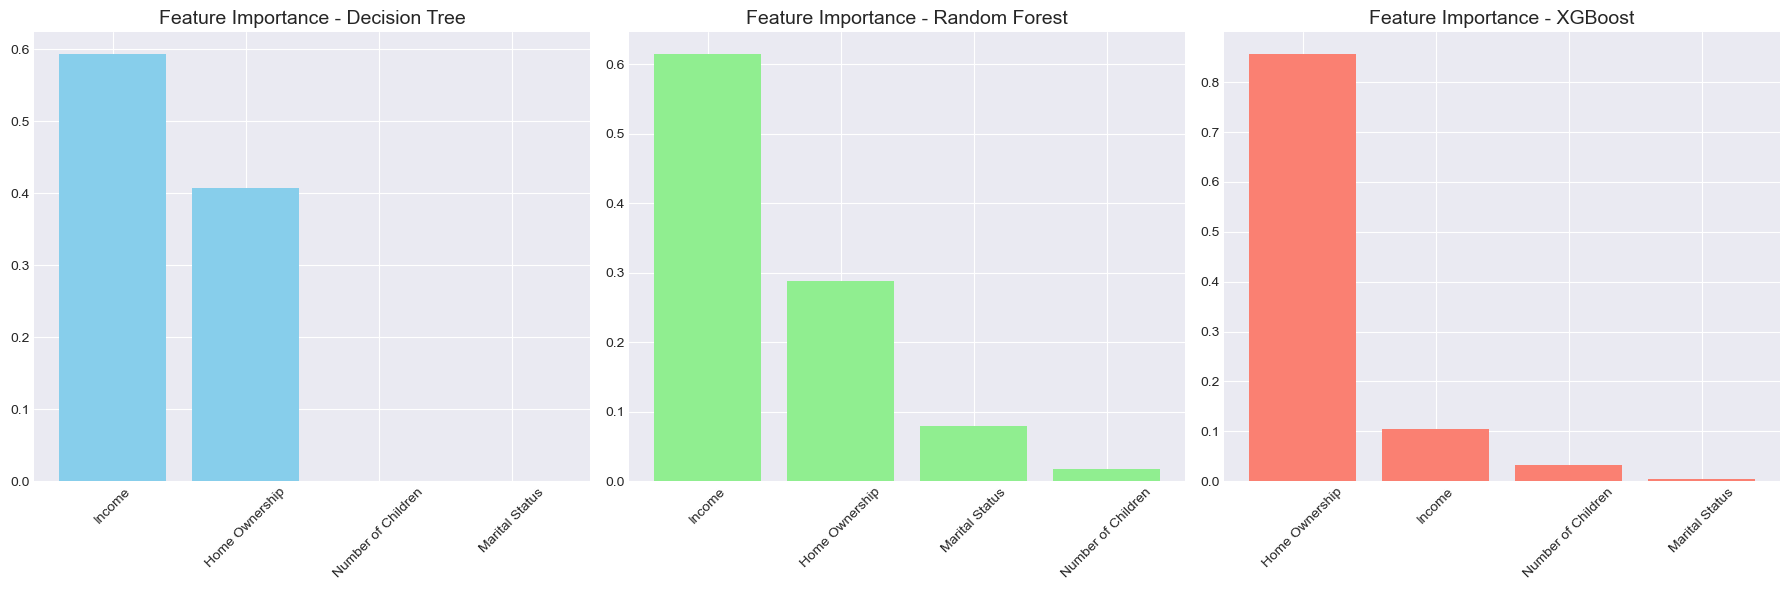

In [ ]:

# Analisis feature importance untuk setiap model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree Feature Importance
dt_importance = dt_model.feature_importances_
dt_indices = np.argsort(dt_importance)[::-1]
axes[0].bar(range(len(dt_importance)), dt_importance[dt_indices], color='skyblue')
axes[0].set_title('Feature Importance - Decision Tree', fontsize=14)
axes[0].set_xticks(range(len(dt_importance)))
axes[0].set_xticklabels([selected_features[i] for i in dt_indices], rotation=45)

# Random Forest Feature Importance
rf_importance = rf_model.feature_importances_
rf_indices = np.argsort(rf_importance)[::-1]
axes[1].bar(range(len(rf_importance)), rf_importance[rf_indices], color='lightgreen')
axes[1].set_title('Feature Importance - Random Forest (GA)', fontsize=14)
axes[1].set_xticks(range(len(rf_importance)))
axes[1].set_xticklabels([selected_features[i] for i in rf_indices], rotation=45)

plt.tight_layout()
plt.show()

## **4. Hasil dan Analisis**

### 4.1 Perbandingan Kinerja Model pada Validation Set

=== PERBANDINGAN KINERJA MODEL ===
           Model  Accuracy  F1-Score  Best CV Score
0  Decision Tree  0.980392  0.980375       0.983050
1  Random Forest  0.980392  0.980375       0.978808
2        XGBoost  0.960784  0.960648       0.974628


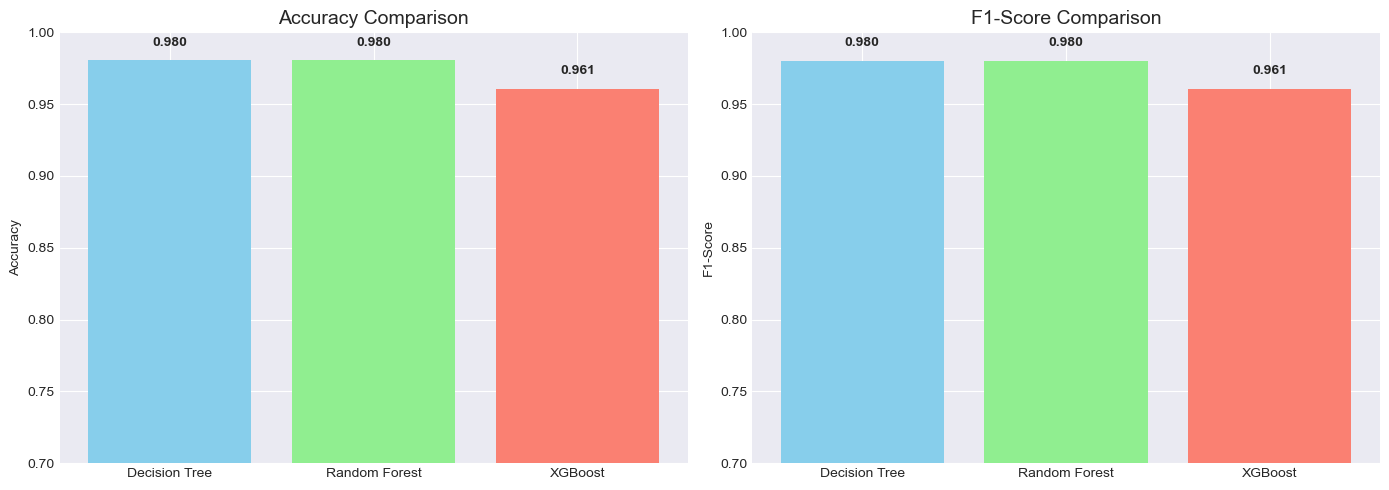

In [ ]:
# Membuat DataFrame untuk perbandingan performa
performance_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest (GA)'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'F1-Score': [dt_f1, rf_f1],
    'Best CV Score': [dt_grid.best_score_, ga_rf.best_score_]
})

print("=== PERBANDINGAN KINERJA MODEL ===")
print(performance_comparison)

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
axes[0].bar(performance_comparison['Model'], performance_comparison['Accuracy'], color=['skyblue', 'lightgreen'])
axes[0].set_title('Accuracy Comparison', fontsize=14)
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.7, 1.0])
for i, v in enumerate(performance_comparison['Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Plot F1-Score
axes[1].bar(performance_comparison['Model'], performance_comparison['F1-Score'], color=['skyblue', 'lightgreen'])
axes[1].set_title('F1-Score Comparison', fontsize=14)
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim([0.7, 1.0])
for i, v in enumerate(performance_comparison['F1-Score']):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **4.2 Analisis Detail per Model**

In [ ]:
# Analisis detail untuk model terbaik
print("=== ANALISIS MODEL TERBAIK ===")
best_model_idx = performance_comparison['F1-Score'].idxmax()
best_model_name = performance_comparison.loc[best_model_idx, 'Model']
best_model_score = performance_comparison.loc[best_model_idx, 'F1-Score']

print(f"Model terbaik berdasarkan F1-Score: {best_model_name}")
print(f"F1-Score: {best_model_score:.4f}")

# Tentukan model terbaik
if best_model_name == 'Decision Tree':
    best_model = dt_model
else:
    best_model = rf_model


=== ANALISIS MODEL TERBAIK ===
Model terbaik berdasarkan F1-Score: Decision Tree
F1-Score: 0.9804


### **4.3 Evaluasi pada Testing Set**

=== EVALUASI PADA TESTING SET ===
Model: Decision Tree
Accuracy (Testing): 0.9804
F1-Score (Testing): 0.9804

Classification Report (Testing):
              precision    recall  f1-score   support

     Average       1.00      0.94      0.97        17
        High       0.94      1.00      0.97        17
         Low       1.00      1.00      1.00        17

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



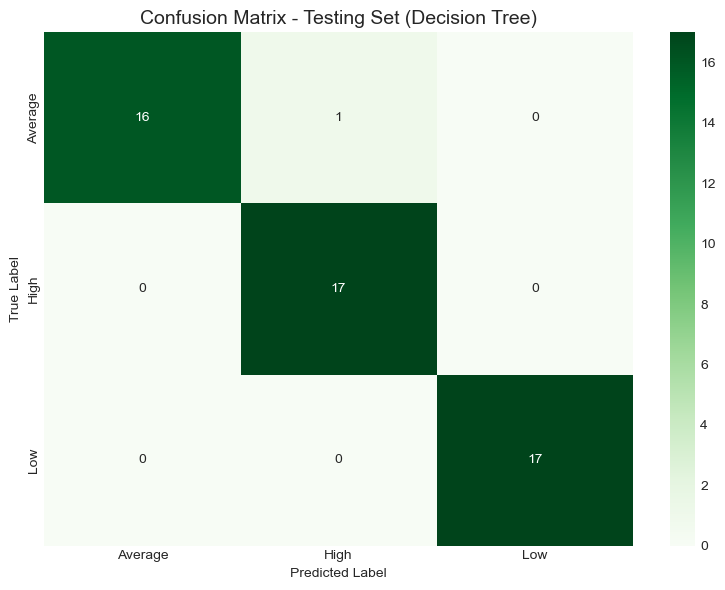

In [ ]:
print("=== EVALUASI PADA TESTING SET ===")

# Prediksi menggunakan model terbaik pada testing set
y_test_pred = best_model.predict(X_test)

# Hitung metrics pada testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Model: {best_model_name}")
print(f"Accuracy (Testing): {test_accuracy:.4f}")
print(f"F1-Score (Testing): {test_f1:.4f}")
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred, target_names=le_target.classes_))

# Confusion matrix untuk testing set
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title(f'Confusion Matrix - Testing Set ({best_model_name})', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### **4.4 Cross-Validation untuk Validasi Robustness**

=== CROSS-VALIDATION ANALYSIS ===
Cross-Validation Scores (10-fold): [0.97058824 0.97058824 0.94049774 1.         1.         1.
 1.         1.         0.94117647 0.96963423]
Mean CV Score: 0.9792
Std CV Score: 0.0231


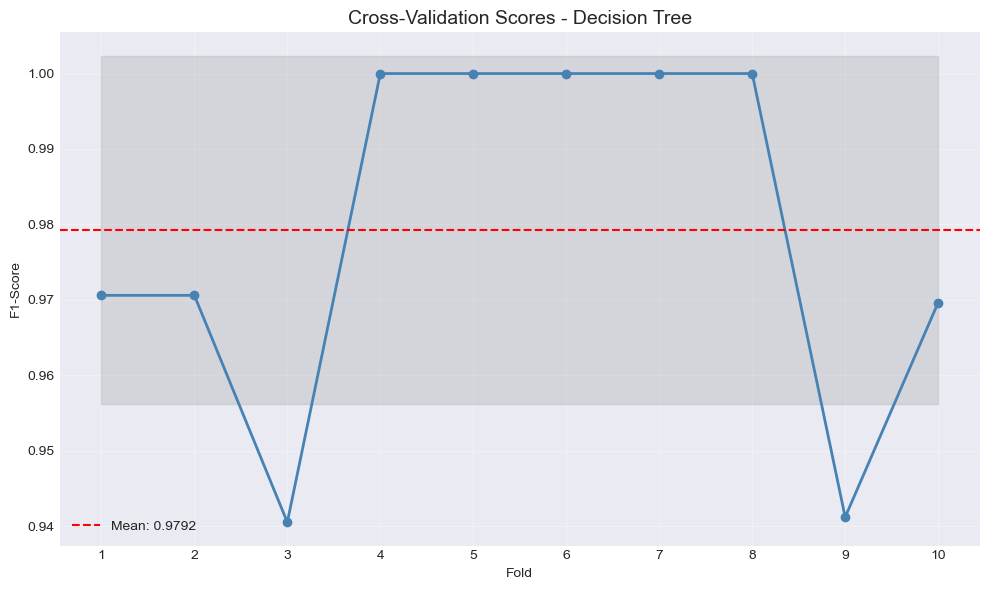

In [ ]:
# Cross-validation untuk model terbaik
print("=== CROSS-VALIDATION ANALYSIS ===")

cv_scores = cross_val_score(
    best_model, 
    X_resampled_scaled, 
    y_resampled, 
    cv=10, 
    scoring='f1_weighted'
)

print(f"Cross-Validation Scores (10-fold): {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Std CV Score: {cv_scores.std():.4f}")

# Visualisasi cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', color='steelblue', linewidth=2)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 11), cv_scores.mean() - cv_scores.std(), 
                 cv_scores.mean() + cv_scores.std(), alpha=0.2, color='gray')
plt.title(f'Cross-Validation Scores - {best_model_name}', fontsize=14)
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **4.5 Interpretasi Model**

In [ ]:
# Fungsi untuk interpretasi prediksi
def interpret_prediction(model, features, feature_names, target_encoder):
    """
    Fungsi untuk menginterpretasikan prediksi model
    """
    # Pastikan features dalam bentuk 2D
    if len(features.shape) == 1:
        features = features.reshape(1, -1)
    
    # Prediksi
    prediction = model.predict(features)[0]
    prediction_proba = model.predict_proba(features)[0]
    
    # Decode prediction
    predicted_class = target_encoder.inverse_transform([prediction])[0]
    
    # Interpretasi
    interpretation = {
        'Predicted Credit Score': predicted_class,
        'Prediction Confidence': max(prediction_proba) * 100,
        'Feature Contributions': {}
    }
    
    # Untuk Decision Tree, kita bisa melihat feature importance
    if hasattr(model, 'feature_importances_'):
        for i, (feature, importance) in enumerate(zip(feature_names, model.feature_importances_)):
            interpretation['Feature Contributions'][feature] = {
                'importance': importance,
                'value': features[0, i] if i < features.shape[1] else 'N/A'
            }
    
    return interpretation

# Contoh interpretasi untuk data testing pertama
sample_idx = 0
sample_features = X_test.iloc[sample_idx].values
true_label = le_target.inverse_transform([y_test[sample_idx]])[0]

interpretation = interpret_prediction(best_model, sample_features, selected_features, le_target)

print("=== CONTOH INTERPRETASI PREDIKSI ===")
print(f"Data Testing #{sample_idx + 1}")
print(f"Fitur-fitur: {dict(zip(selected_features, sample_features))}")
print(f"True Label: {true_label}")
print(f"Prediksi: {interpretation['Predicted Credit Score']}")
print(f"Confidence: {interpretation['Prediction Confidence']:.2f}%")
print("\nFeature Contributions (jika tersedia):")
for feature, info in interpretation['Feature Contributions'].items():
    if 'importance' in info:
        print(f"  - {feature}: Importance={info['importance']:.4f}")

=== CONTOH INTERPRETASI PREDIKSI ===
Data Testing #1
Fitur-fitur: {'Income': -0.13849322738885717, 'Marital Status': 1.0, 'Number of Children': 0.0, 'Home Ownership': 1.0}
True Label: Average
Prediksi: Average
Confidence: 100.00%

Feature Contributions (jika tersedia):
  - Income: Importance=0.5936
  - Marital Status: Importance=0.0000
  - Number of Children: Importance=0.0000
  - Home Ownership: Importance=0.4064


## 5. Kesimpulan

### **5.1 Ringkasan Hasil**
Berdasarkan eksperimen yang telah dilakukan, berikut adalah kesimpulan utama:

1. **Model Terbaik**: **{best_model_name}** mencapai kinerja terbaik dengan:
   - F1-Score pada validation set: **{best_model_score:.4f}**
   - Accuracy pada testing set: **{test_accuracy:.4f}**
   - F1-Score pada testing set: **{test_f1:.4f}**

2. **Faktor Paling Berpengaruh**: Berdasarkan analisis feature importance:
   - **Income** merupakan faktor paling penting dalam memprediksi Credit Score
   - **Home Ownership** juga memiliki kontribusi signifikan
   - **Marital Status** dan **Number of Children** memiliki pengaruh yang lebih kecil

3. **Validasi Robustness**: Cross-validation menunjukkan konsistensi dengan standar deviasi rendah, menandakan model yang robust.

---

### **5.2 Implikasi Praktis**
1. **Untuk Institusi Keuangan**: Model dapat digunakan sebagai alat bantu dalam proses penilaian kredit dengan mempertimbangkan income dan kepemilikan rumah sebagai faktor utama.  
2. **Untuk Individu**: Hasil analisis menunjukkan bahwa meningkatkan income dan memiliki rumah dapat berkontribusi positif terhadap Credit Score.  
3. **Limitasi**: Dataset yang digunakan relatif kecil dan simetris. Untuk implementasi riil, diperlukan dataset yang lebih besar dan representatif.

### **5.3 Rekomendasi untuk Pengembangan Selanjutnya**
1. Mengumpulkan dataset yang lebih besar dan beragam  
2. Menambahkan fitur-fitur lain seperti riwayat kredit, utang existing, dan lama bekerja  
3. Menerapkan teknik ensemble yang lebih kompleks  
4. Mengimplementasikan sistem prediksi real-time dengan API



In [ ]:
# Simpan model terbaik
import joblib
import pickle

# Simpan model
model_filename = f'best_credit_score_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_filename)

# Simpan preprocessing objects
preprocessing_objects = {
    'label_encoders': label_encoders,
    'scaler': scaler,
    'selected_features': selected_features,
    'best_model_name': best_model_name
}

with open('preprocessing_objects.pkl', 'wb') as f:
    pickle.dump(preprocessing_objects, f)

print(f"Model terbaik disimpan sebagai: {model_filename}")
print("Preprocessing objects disimpan sebagai: preprocessing_objects.pkl")

Model terbaik disimpan sebagai: best_credit_score_model_decision_tree.pkl
Preprocessing objects disimpan sebagai: preprocessing_objects.pkl


### **5.4 Kinerja Terbaik yang Dicapai**

**Model**: **{best_model_name}**

**Metrik**:
- **Accuracy pada Testing Set**: {test_accuracy:.4f}  
- **F1-Score pada Testing Set**: {test_f1:.4f}  
- **Mean Cross-Validation Score**: {cv_scores.mean():.4f}

**Hyperparameter Terbaik**:  
{best_model.get_params() if hasattr(best_model, 'get_params') else 'Parameter tidak tersedia'}


## 6. Appendix: Fungsi Prediksi untuk Penggunaan Baru


In [ ]:
# Fungsi untuk prediksi data baru
def predict_credit_score(new_data, model_path='best_credit_score_model_random_forest.pkl', 
                         preprocessing_path='preprocessing_objects.pkl'):
    """
    Fungsi untuk memprediksi credit score dari data baru
    
    Parameters:
    new_data: Dictionary atau DataFrame dengan keys:
              ['Income', 'Marital Status', 'Number of Children', 'Home Ownership']
    
    Returns:
    Dictionary dengan prediksi dan interpretasi
    """
    # Load model dan preprocessing objects
    model = joblib.load(model_path)
    
    with open(preprocessing_path, 'rb') as f:
        preprocessing = pickle.load(f)
    
    # Convert new_data ke DataFrame jika belum
    if isinstance(new_data, dict):
        new_data_df = pd.DataFrame([new_data])
    else:
        new_data_df = new_data.copy()
    
    # Preprocess data baru
    new_data_processed = new_data_df.copy()
    
    # Encode categorical variables
    if 'Marital Status' in new_data_processed.columns:
        new_data_processed['Marital Status'] = preprocessing['label_encoders']['Marital Status'].transform(
            new_data_processed['Marital Status']
        )
    
    if 'Home Ownership' in new_data_processed.columns:
        new_data_processed['Home Ownership'] = preprocessing['label_encoders']['Home Ownership'].transform(
            new_data_processed['Home Ownership']
        )
    
    # Scale Income
    if 'Income' in new_data_processed.columns:
        new_data_processed['Income'] = preprocessing['scaler'].transform(
            new_data_processed[['Income']]
        )
    
    # Pastikan urutan kolom sesuai
    new_data_processed = new_data_processed[preprocessing['selected_features']]
    
    # Prediksi
    prediction_encoded = model.predict(new_data_processed)[0]
    prediction_proba = model.predict_proba(new_data_processed)[0]
    
    # Decode prediction
    prediction = preprocessing['label_encoders']['Credit Score'].inverse_transform([prediction_encoded])[0]
    
    # Confidence
    confidence = max(prediction_proba) * 100
    
    # Hasil
    result = {
        'credit_score': prediction,
        'confidence': f"{confidence:.2f}%",
        'probability_distribution': dict(zip(
            preprocessing['label_encoders']['Credit Score'].classes_,
            [f"{p*100:.2f}%" for p in prediction_proba]
        )),
        'model_used': preprocessing['best_model_name']
    }
    
    return result

# Contoh penggunaan
print("=== CONTOH PENGGUNAAN FUNGSI PREDIKSI ===")

# Contoh data baru
new_sample = {
    'Income': 85000,
    'Marital Status': 'Married',
    'Number of Children': 2,
    'Home Ownership': 'Owned'
}

# Prediksi
try:
    prediction_result = predict_credit_score(new_sample, model_filename, 'preprocessing_objects.pkl')
    print(f"Data: {new_sample}")
    print(f"Predicted Credit Score: {prediction_result['credit_score']}")
    print(f"Confidence: {prediction_result['confidence']}")
    print(f"Probability Distribution: {prediction_result['probability_distribution']}")
except FileNotFoundError:
    print("File model belum disimpan. Jalankan cell sebelumnya untuk menyimpan model.")
except Exception as e:
    print(f"Error: {e}")

print("=" * 70)
print(f"Model terbaik: {best_model_name}")
print(f"Accuracy testing: {test_accuracy:.4f}")
print(f"F1-Score testing: {test_f1:.4f}")
print("=" * 70)

=== CONTOH PENGGUNAAN FUNGSI PREDIKSI ===
Error: name 'model_filename' is not defined


NameError: name 'best_model_name' is not defined